# Graph creation

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#set to True to save plot images
savePlot = True

failuresFile = 'tech-failures-constructor-year.csv'
accidentsFile = 'accidents-per-year-circuit.csv'
fastestQ3File = 'fastest-q3-circuit-year.csv'
avgTimesFile = 'avg-pitstop-time-constructors.csv'

df = pd.read_csv(failuresFile, encoding='UTF-8')

df.head()

name  year  nTechFailures
0       McLaren  2017             12
1       Renault  2017             12
2      Red Bull  2017              9
3    Toro Rosso  2017              7
4  Haas F1 Team  2017              6

In [3]:
#get values for some constructors
ferrari = df.loc[df['name'] == 'Ferrari']
mclaren = df.loc[df['name'] == 'McLaren']
mclaren.head()

name  year  nTechFailures
0   McLaren  2017             12
10  McLaren  2016              8
22  McLaren  2015              8
39  McLaren  2014              2
50  McLaren  2013              2

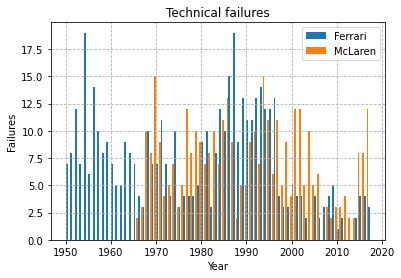

In [4]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title('Technical failures')
ax.set_xlabel('Year')
ax.set_ylabel('Failures')

width = 0.4

ax.bar(ferrari['year'] + width/2, ferrari['nTechFailures'], width, label='Ferrari', align='center')
ax.bar(mclaren['year'] - width/2, mclaren['nTechFailures'], width, label='McLaren', align='center')

ax.grid(linestyle='--')
plt.legend(loc='upper right')
if savePlot:
    fig.savefig('failures.png', format='png', dpi=1200)

In [5]:
df = pd.read_csv(accidentsFile, encoding='UTF-8')

df.head()

name  year  accidents
0                     AVUS  1959          1
1  Adelaide Street Circuit  1995          7
2  Adelaide Street Circuit  1994          5
3  Adelaide Street Circuit  1993          5
4  Adelaide Street Circuit  1992          5

In [6]:
#get values for some circuits
monza = df.loc[df['name'] == 'Autodromo Nazionale di Monza']
monaco = df.loc[df['name'] == 'Circuit de Monaco']
silverstone = df.loc[df['name'] == 'Silverstone Circuit']
spa = df.loc[df['name'] == 'Circuit de Spa-Francorchamps']

monza.head()

name  year  accidents
58  Autodromo Nazionale di Monza  2016          2
59  Autodromo Nazionale di Monza  2015          2
60  Autodromo Nazionale di Monza  2014          1
61  Autodromo Nazionale di Monza  2013          1
62  Autodromo Nazionale di Monza  2011          4

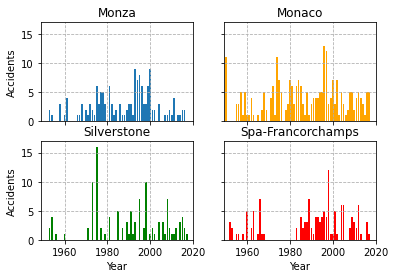

In [7]:
fig, ax = plt.subplots(2, 2)
#fig.tight_layout(pad=1.5)
#fig.subplots_adjust(hspace=0.7)
fig.patch.set_facecolor('white')
plt.title('Incidents each year')

for axis in ax.flat:
    axis.set(xlabel='Year', ylabel='Accidents')
    axis.label_outer()
    axis.set_ylim([0, 17])
    axis.set_xlim([1949, 2020])

ax[0,0].set_title('Monza')
ax[0,1].set_title('Monaco')
ax[1,0].set_title('Silverstone')
ax[1,1].set_title('Spa-Francorchamps')

#ax[0,0].label_outer()
#ax[1,0].label_outer()

ax[0,0].bar(monza['year'], monza['accidents'])
ax[0,1].bar(monaco['year'], monaco['accidents'], color='orange')
ax[1,0].bar(silverstone['year'], silverstone['accidents'], color='green')
ax[1,1].bar(spa['year'], spa['accidents'], color='red')

ax[0,0].grid(linestyle='--')
ax[0,1].grid(linestyle='--')
ax[1,0].grid(linestyle='--')
ax[1,1].grid(linestyle='--')

if savePlot:
    fig.savefig('accidents.png', format='png', dpi=1200)

In [8]:
df = pd.read_csv(fastestQ3File, encoding='UTF-8')
df.head()

#convert each time into seconds
fastest = []
for index, row in df.iterrows():
    lap = row['fastest']
    lap = lap.split('M')
    minutes = lap[0]
    seconds = lap[1]
    minutes = minutes.replace('PT', '').replace('M' ,'')
    seconds = seconds.replace('S', '')
    minutes = int(minutes) * 60
    seconds = float(seconds)
    lap = minutes + seconds
    fastest.append(lap)
    
df['fastest'] = fastest

In [9]:
monza = df.loc[df['name'] == 'Autodromo Nazionale di Monza']
monaco = df.loc[df['name'] == 'Circuit de Monaco']
villeneuve = df.loc[df['name'] == 'Circuit Gilles Villeneuve']
silverstone = df.loc[df['name'] == 'Silverstone Circuit']
albert = df.loc[df['name'] == 'Albert Park Grand Prix Circuit']
monza.head()

name  year  fastest
13  Autodromo Nazionale di Monza  2016   81.135
14  Autodromo Nazionale di Monza  2006   81.484
15  Autodromo Nazionale di Monza  2010   81.962
16  Autodromo Nazionale di Monza  2007   81.997
17  Autodromo Nazionale di Monza  2011   82.275

In [10]:
monza = monza.sort_values(by = 'year')
monaco = monaco.sort_values(by = 'year')
villeneuve = villeneuve.sort_values(by = 'year')
silverstone = silverstone.sort_values(by='year')
albert = albert.sort_values(by='year')

In [11]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title('Fastest Q3 time')
ax.set_xlabel('Year')
ax.set_ylabel('Time (s)')

ax.set_ylim([70, 116])
ax.set_yticks(range(70, 120, 5))
ax.plot(monza['year'], monza['fastest'], label='Monza')
ax.plot(monaco['year'], monaco['fastest'], label='Monaco')
ax.plot(villeneuve['year'], villeneuve['fastest'], label='Villeneuve')
ax.plot(silverstone['year'], silverstone['fastest'], label='Silverstone')
ax.plot(albert['year'], albert['fastest'], label = 'Albert Park')
ax.grid(linestyle='--')
plt.legend(loc='upper left')
if savePlot:
    fig.savefig('fastest.png', format='png', dpi=1200)

In [12]:
df = pd.read_csv(avgTimesFile, sep=',', encoding='UTF-8')
#df['averageTimeInMillis'] = df['averageTimeInMillis'].astype(str).str.replace('.', ',')
#df['averageTimeInMillis'] = df['averageTimeInMillis'].astype(int)
df.head()

name  year                     circuitName  averageTimeInMillis
0  Caterham  2014  Albert Park Grand Prix Circuit              23238.0
1  Caterham  2013  Albert Park Grand Prix Circuit              23751.6
2  Caterham  2012  Albert Park Grand Prix Circuit              25611.0
3  Caterham  2014    Autodromo Nazionale di Monza              26981.0
4  Caterham  2013    Autodromo Nazionale di Monza              27858.5

In [13]:
ferrari = df.loc[df['name'] == 'Ferrari']
ferrari = ferrari.sort_values(by='year')
ferrari.head()

name  year                   circuitName  averageTimeInMillis
188  Ferrari  2011            Yas Marina Circuit         20507.750000
109  Ferrari  2011             Circuit de Monaco         27783.000000
116  Ferrari  2011  Circuit de Spa-Francorchamps         21569.000000
95   Ferrari  2011     Circuit Gilles Villeneuve         24986.285714
88   Ferrari  2011   Buddh International Circuit         21602.800000

In [14]:
ferrari_monza = ferrari.loc[ferrari['circuitName'] == 'Autodromo Nazionale di Monza']
ferrari_monaco = ferrari.loc[ferrari['circuitName'] == 'Circuit de Monaco']
ferrari_silverstone = ferrari.loc[ferrari['circuitName'] == 'Silverstone Circuit']
ferrari_villeneuve = ferrari.loc[ferrari['circuitName'] == 'Circuit Gilles Villeneuve']
ferrari_bahrain = ferrari.loc[ferrari['circuitName'] == 'Bahrain International Circuit']
ferrari_monza.head()

name  year                   circuitName  averageTimeInMillis
67  Ferrari  2011  Autodromo Nazionale di Monza             22124.25
66  Ferrari  2012  Autodromo Nazionale di Monza             21838.00
65  Ferrari  2013  Autodromo Nazionale di Monza             24450.00
64  Ferrari  2014  Autodromo Nazionale di Monza             24730.00
63  Ferrari  2015  Autodromo Nazionale di Monza             24391.00

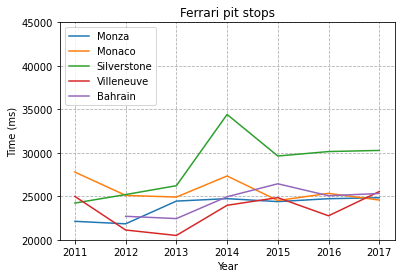

In [15]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title('Ferrari pit stops')
ax.set_xlabel('Year')
ax.set_ylabel('Time (ms)')
ax.set_ylim([20000, 45000])

ax.plot(ferrari_monza['year'], ferrari_monza['averageTimeInMillis'], label='Monza')
ax.plot(ferrari_monaco['year'], ferrari_monaco['averageTimeInMillis'], label='Monaco')
ax.plot(ferrari_silverstone['year'], ferrari_silverstone['averageTimeInMillis'], label='Silverstone')
ax.plot(ferrari_villeneuve['year'], ferrari_villeneuve['averageTimeInMillis'], label='Villeneuve')
ax.plot(ferrari_bahrain['year'], ferrari_bahrain['averageTimeInMillis'], label='Bahrain')


ax.grid(linestyle='--')
plt.legend(loc='upper left')
if savePlot:
    fig.savefig('avgPitFerrari.png', format='png', dpi=1200)

In [16]:
mclaren = df.loc[df['name'] == 'McLaren']
mclaren = mclaren.sort_values(by='year')
mclaren.head()

name  year                   circuitName  averageTimeInMillis
720  McLaren  2011            Yas Marina Circuit         19999.500000
640  McLaren  2011             Circuit de Monaco         25690.000000
647  McLaren  2011  Circuit de Spa-Francorchamps         22834.250000
626  McLaren  2011     Circuit Gilles Villeneuve         23511.166667
619  McLaren  2011   Buddh International Circuit         22965.000000

In [17]:
mclaren_monza = mclaren.loc[mclaren['circuitName'] == 'Autodromo Nazionale di Monza']
mclaren_monaco = mclaren.loc[mclaren['circuitName'] == 'Circuit de Monaco']
mclaren_silverstone = mclaren.loc[mclaren['circuitName'] == 'Silverstone Circuit']
mclaren_villeneuve = mclaren.loc[mclaren['circuitName'] == 'Circuit Gilles Villeneuve']
mclaren_bahrain = mclaren.loc[mclaren['circuitName'] == 'Bahrain International Circuit']
mclaren_monza.head()

name  year                   circuitName  averageTimeInMillis
598  McLaren  2011  Autodromo Nazionale di Monza         21928.500000
597  McLaren  2012  Autodromo Nazionale di Monza         22055.500000
596  McLaren  2013  Autodromo Nazionale di Monza         25191.500000
595  McLaren  2014  Autodromo Nazionale di Monza         24441.500000
594  McLaren  2015  Autodromo Nazionale di Monza         22671.333333

In [18]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.title('McLaren pit stops')
ax.set_xlabel('Year')
ax.set_ylabel('Time (ms)')
ax.set_ylim([20000, 45000])

ax.plot(mclaren_monza['year'], mclaren_monza['averageTimeInMillis'], label='Monza')
ax.plot(mclaren_monaco['year'], mclaren_monaco['averageTimeInMillis'], label='Monaco')
ax.plot(mclaren_silverstone['year'], mclaren_silverstone['averageTimeInMillis'], label='Silverstone')
ax.plot(mclaren_villeneuve['year'], mclaren_villeneuve['averageTimeInMillis'], label='Villeneuve')
ax.plot(mclaren_bahrain['year'], mclaren_bahrain['averageTimeInMillis'], label='Bahrain')

ax.grid(linestyle='--')
plt.legend(loc='upper left')
if savePlot:
    fig.savefig('avgPitMcLaren.png', format='png', dpi=1200)